The content of the breast cancer dataset is:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
-------------------------
inputs =  (569, 30)
outputs =  (569,)
labels =  (30,)


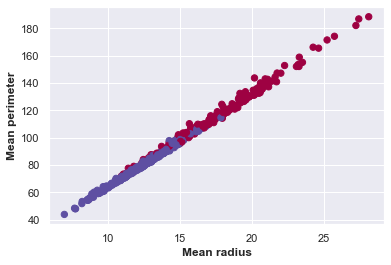

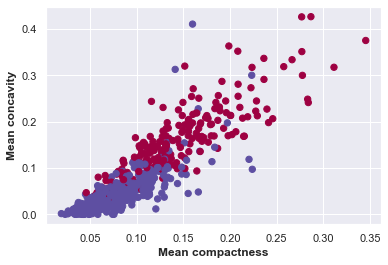

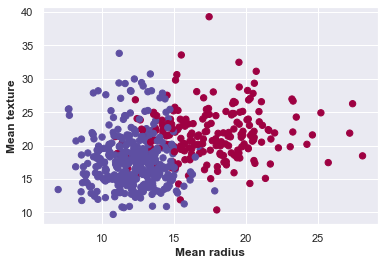

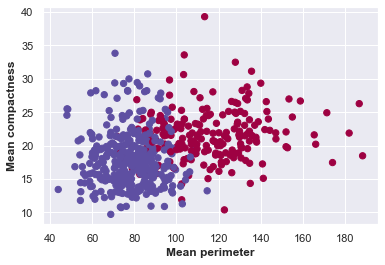

In [14]:
#from tensorflow.keras.utils import to_categorical   #This allows using categorical cross entropy as the cost function
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as splitter
from sklearn.datasets import load_breast_cancer
from dnn_class import *
import pickle
import os 
from dnn_regr import *
from misc import *
import sklearn as sk
from sklearn.metrics import accuracy_score
import seaborn as sns


"""Load breast cancer dataset"""

np.random.seed(0)        #create same seed for random number every time

cancer=load_breast_cancer()      #Download breast cancer dataset

inputs=cancer.data                     #Feature matrix of 569 rows (samples) and 30 columns (parameters)
outputs=cancer.target                  #Label array of 569 rows (0 for benign and 1 for malignant)
labels=cancer.feature_names[0:30]

print('The content of the breast cancer dataset is:')      #Print information about the datasets
print(labels)
print('-------------------------')
print("inputs =  " + str(inputs.shape))
print("outputs =  " + str(outputs.shape))
print("labels =  "+ str(labels.shape))

x=inputs      #Reassign the Feature and Label matrices to other variables
y=outputs

# Visualisation of dataset (for correlation analysis)

plt.figure()
plt.scatter(x[:,0],x[:,2],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean radius',fontweight='bold')
plt.ylabel('Mean perimeter',fontweight='bold')
plt.show()

plt.figure()
plt.scatter(x[:,5],x[:,6],s=40,c=y, cmap=plt.cm.Spectral)
plt.xlabel('Mean compactness',fontweight='bold')
plt.ylabel('Mean concavity',fontweight='bold')
plt.show()


plt.figure()
plt.scatter(x[:,0],x[:,1],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean radius',fontweight='bold')
plt.ylabel('Mean texture',fontweight='bold')
plt.show()

plt.figure()
plt.scatter(x[:,2],x[:,1],s=40,c=y,cmap=plt.cm.Spectral)
plt.xlabel('Mean perimeter',fontweight='bold')
plt.ylabel('Mean compactness',fontweight='bold')
plt.show()

X = inputs[:,[1,2,5,8]].T
lb = sk.preprocessing.LabelBinarizer()
Ybc = lb.fit_transform(outputs)
ybc_next = np.where(outputs==0,1,0)
Ybc = Ybc.T
Ybc = list(Ybc)
Ybc.append(ybc_next)
Y = np.array(Ybc)

In [15]:
print(X.shape)
print(Y.shape)
X_train,X_test,Y_train,Y_test=splitter(X.T,Y.T,test_size=0.2)
X_train=X_train.T
X_test=X_test.T
Y_train=Y_train.T
Y_test=Y_test.T

(4, 569)
(2, 569)


In [16]:
model = DNNClassifier(layer_dims=[X_train.shape[0], 200, 50, 2],hidden_layers=[('relu',0),('relu',0.001),'softmax'],
                      optimization_method='ADAM',tolarance=None,batch_size=64,max_epoch=200,verbose=0,seed=25)
model = model.fit(X_train,Y_train)
Y_nn = model.predict(X_test)
print("Training Accuracy: ", accuracy_score(Y_test[0].T,Y_nn))

Training Accuracy:  0.14035087719298245


In [26]:
print("LAMBDA VS LEARNING RATE PERFORMANCE")

#lambdas = [0,1e-12, 1e-10, 1e-5, 1e-2, 0.1]
#etas = [1e-6,1e-5, 1e-4, 1e-3, 1e-2, 0.1]
etas = np.logspace(-5, 1, 12)
lambdas = np.logspace(-12, 1, 12)

acc = np.zeros((len(lambdas), len(etas)))

for i in range(len(lambdas)):
    for j in range(len(etas)):
        model = DNNClassifier(layer_dims=[X_train.shape[0], 200, 50, 2],hidden_layers=[('relu',0),('relu',0.001),'softmax'],
                              optimization_method='SGD',tolarance=None,batch_size=64,max_epoch=200,verbose=0,seed=4444, 
                              penality='l2', lamda=lambdas[i],learning_rate=etas[j])
        model = model.fit(X_train,Y_train)
        Y_nn = model.predict(X_test)
        #print("Training Accuracy: ", accuracy_score(Y_test[0].T,Y_nn)) 
        acc[i][j] = accuracy_score(Y_test[0].T,Y_nn)

LAMBDA VS LEARNING RATE PERFORMANCE


MSE: Best result given by lambda = 1e-12 and learning rate = 1e-05


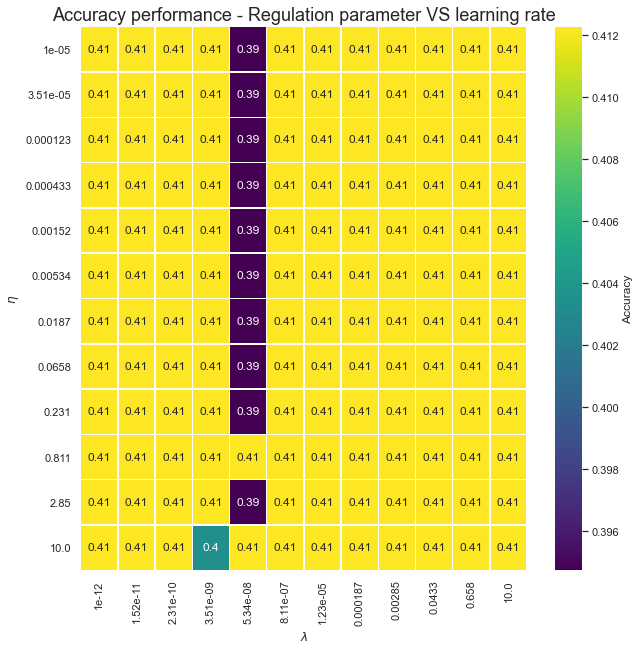

In [27]:
sns.set()

ind= find_max_indexes(acc)
lmd=lambdas[ind[1]]
eta=etas[ind[0]]
print("MSE: Best result given by lambda = "+str(lmd)+" and learning rate = "+str(eta))

lmbs = ['%s' % float('%.3g' % lmd) for lmd in lambdas]
ets = ['%s' % float('%.3g' % et) for et in etas]
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(acc, annot=True, ax=ax, cmap="viridis", xticklabels=lmbs, cbar_kws={'label': 'Accuracy'}, yticklabels=ets, linewidths=.5)
ax.set_title("Accuracy performance - Regulation parameter VS learning rate", fontsize=18)
ax.set_ylabel(r"$\eta$")
ax.set_xlabel(r"$\lambda$")
fig.savefig('Figures/ClassNN_lmd_eta.jpg')
plt.show()

['sigmoid', 'sigmoid', 'softmax']
0.8402686922027007
[('relu', 0), ('relu', 0.001), 'softmax']
0.4587743071208874
[('elu', 0), ('elu', 0.001), 'softmax']
0.5484108381168188


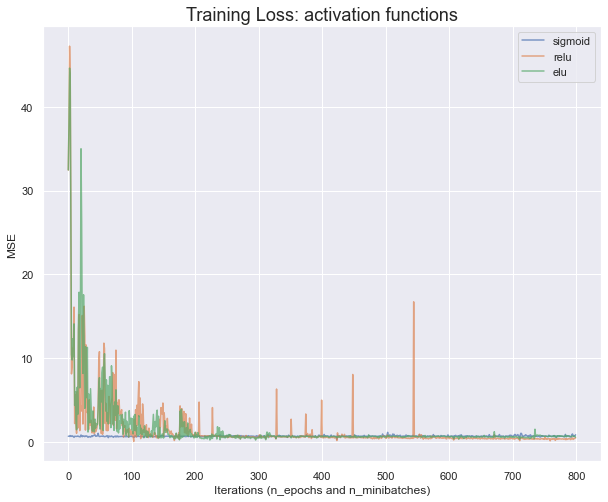

{'sigmoid': 0.41228070175438597, 'relu': 0.09649122807017543, 'elu': 0.41228070175438597}


In [57]:
activations = [['sigmoid', 'sigmoid', 'softmax'],[('relu',0),('relu',0.001),'softmax'],[('elu',0),('elu',0.001),'softmax']]
labels = ['sigmoid', 'relu', 'elu']
acc =  {}
#epochs = 100
#r = list(range(1,epochs+1))

model = DNNClassifier(layer_dims=[X_train.shape[0], 200, 50, 2],hidden_layers=act,
                              optimization_method='SGD',tolarance=None,batch_size=64,max_epoch=epochs,verbose=0,seed=4444, 
                              learning_rate=0.005)
r = range(len(model.fit(X_train,Y_train).costs))
fig = plt.figure(figsize=(10,8))
for a,act in enumerate(activations):

    print(act)
    model = DNNClassifier(layer_dims=[X_train.shape[0], 200, 50, 2],hidden_layers=act,
                              optimization_method='ADAM',tolarance=None,batch_size=64,max_epoch=epochs,verbose=0,seed=4444, )
    model = model.fit(X_train,Y_train)
    #Y_nn = model.predict(X_test)
    # = accuracy_score(Y_test[0].T,Y_nn)
    print(model.costs[-1])
    plt.plot(r,model.costs,label = labels[a], alpha=0.7)
    Y_nn = model.predict(X_test)
    acc[labels[a]] = accuracy_score(Y_test[0].T,Y_nn)

plt.xlabel('Iterations (n_epochs and n_minibatches)')
plt.ylabel('MSE')
plt.title('Training Loss: activation functions', fontsize=18)
#plt.ylim(0.4,1)
plt.legend()
plt.show()
fig.savefig('Figures/ClassNN_activations.jpg')
    
print(acc)